In [1]:
!pip install pandas

     --------------------------------------- 10.4/10.4 MB 65.6 MB/s eta 0:00:00
     ------------------------------------- 500.6/500.6 kB 30.6 MB/s eta 0:00:00
     --------------------------------------- 14.6/14.6 MB 65.6 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 25.6 MB/s eta 0:00:00
     ------------------------------------- 960.0/960.0 kB 63.3 MB/s eta 0:00:00
     ---------------------------------------- 164.1/164.1 kB ? eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 51.8 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00


In [3]:
!pip install seaborn

     -------------------------------------- 285.1/285.1 kB 8.9 MB/s eta 0:00:00


In [4]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 33.5 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 43.5 MB/s eta 0:00:00
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [5]:
!pip install numpy

In [6]:
import pandas as pd

In [7]:
import matplotlib as plt

In [8]:
import seaborn as sns

In [9]:
import sklearn

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

# 1. Reading and Merging training data

In [12]:
df_train_ft = pd.read_csv('train_features.csv')

In [13]:
df_train_sal = pd.read_csv('train_salaries.csv')

In [14]:
df_train_ft.shape

(1000000, 8)

In [15]:
df_train_sal.shape

(1000000, 2)

In [16]:
df_train_ft.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [17]:
df_train_sal.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [18]:
df_train_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### Deduction
No Missing values in the dataset.

In [19]:
df_train_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [20]:
df_train_ft.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [21]:
df_train_sal.nunique()

jobId     1000000
salary        280
dtype: int64

### Merging training features and training salaries

In [22]:
df_train = pd.merge(df_train_ft, df_train_sal['salary'], left_index=True, right_index=True, how='outer')

In [23]:
df_train.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [24]:
df_train.shape

(1000000, 9)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [26]:
df_train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

Data is fiarly clean. There are no missing values, no null values, and no dummy values.

# 2. Data Exploratory Analysis

## 2.1. Single variabel analysis
#### Salary

C:\Users\scommaa\AppData\Local\Temp\ipykernel_21700\3661654002.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.salary)


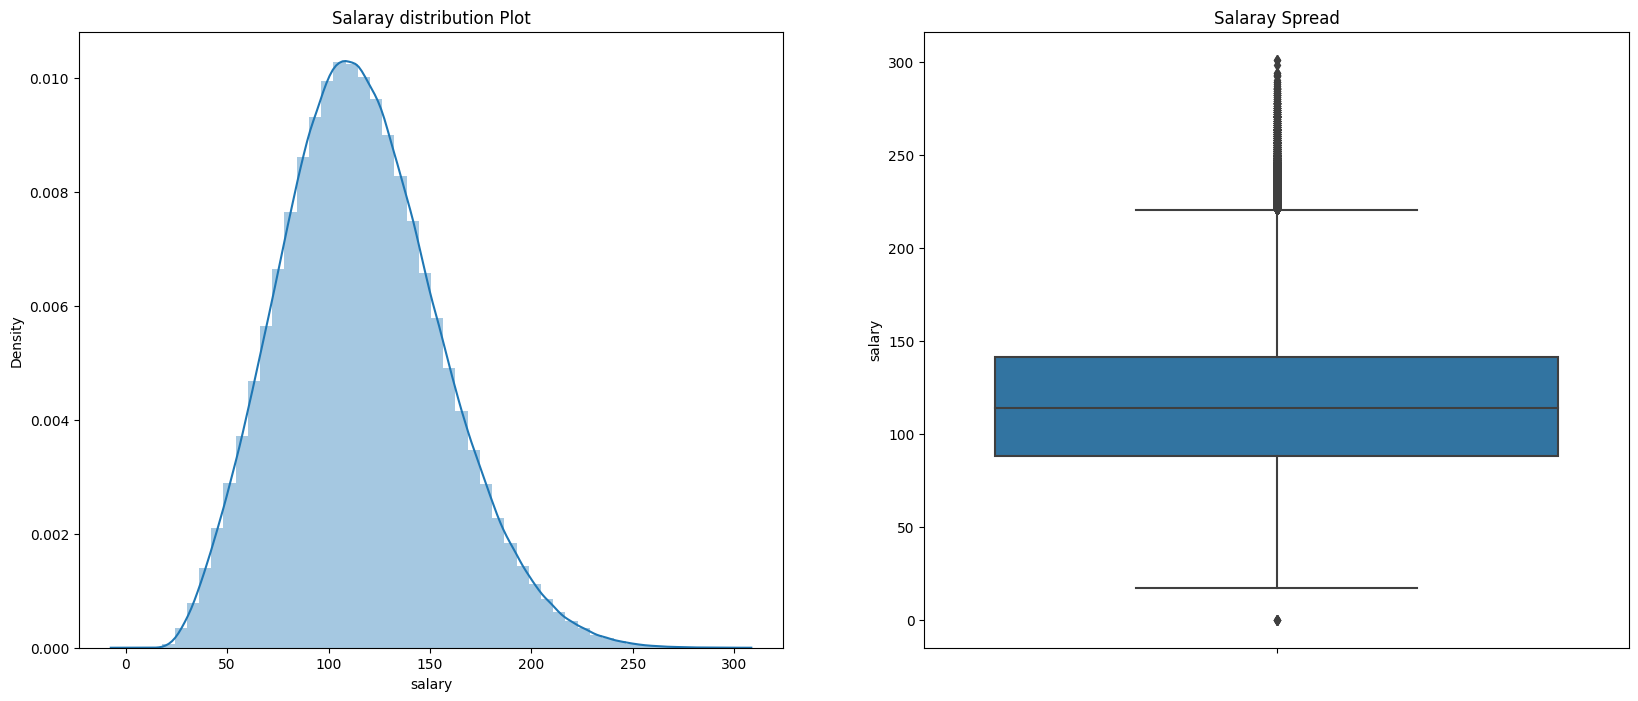

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Salaray distribution Plot')
sns.distplot(df_train.salary)

plt.subplot(1,2,2)
plt.title('Salaray Spread')
sns.boxplot(y=df_train.salary)

plt.show()

In [28]:
print(df_train.salary.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
85%          157.000000
90%          168.000000
100%         301.000000
max          301.000000
Name: salary, dtype: float64


### Deduction
1) The slaraies of the employees in the dataset is normaly distributed.

2) There are a few outliers but there number is not significant. (5 values = 0, and only around 200 values above 250.) 

### Years of experience

C:\Users\scommaa\AppData\Local\Temp\ipykernel_21700\2972617668.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.yearsExperience)


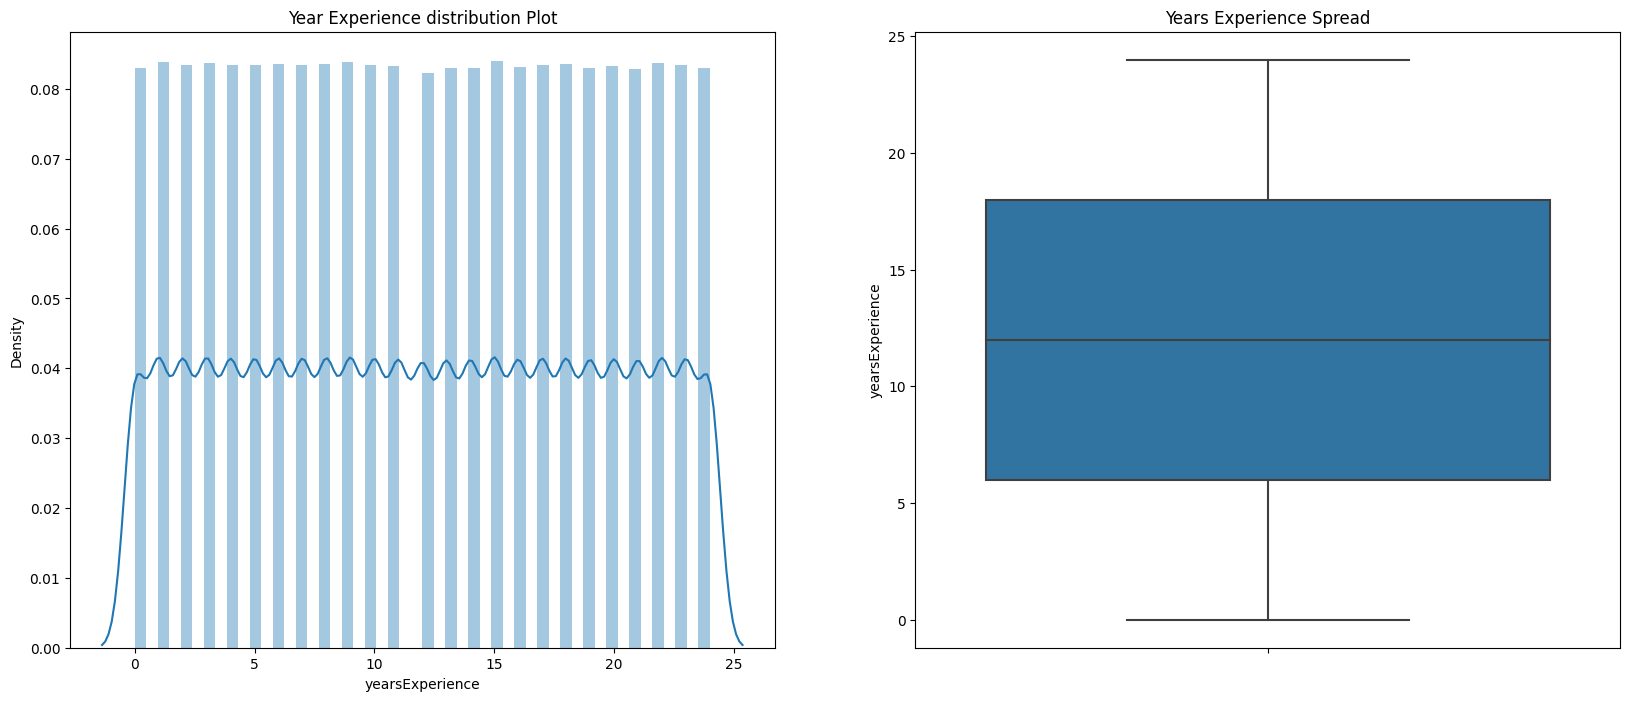

In [29]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Year Experience distribution Plot')
sns.distplot(df_train.yearsExperience)

plt.subplot(1,2,2)
plt.title('Years Experience Spread')
sns.boxplot(y=df_train.yearsExperience)

plt.show()

### Miles from metropolis

C:\Users\scommaa\AppData\Local\Temp\ipykernel_21700\1798809805.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.milesFromMetropolis)


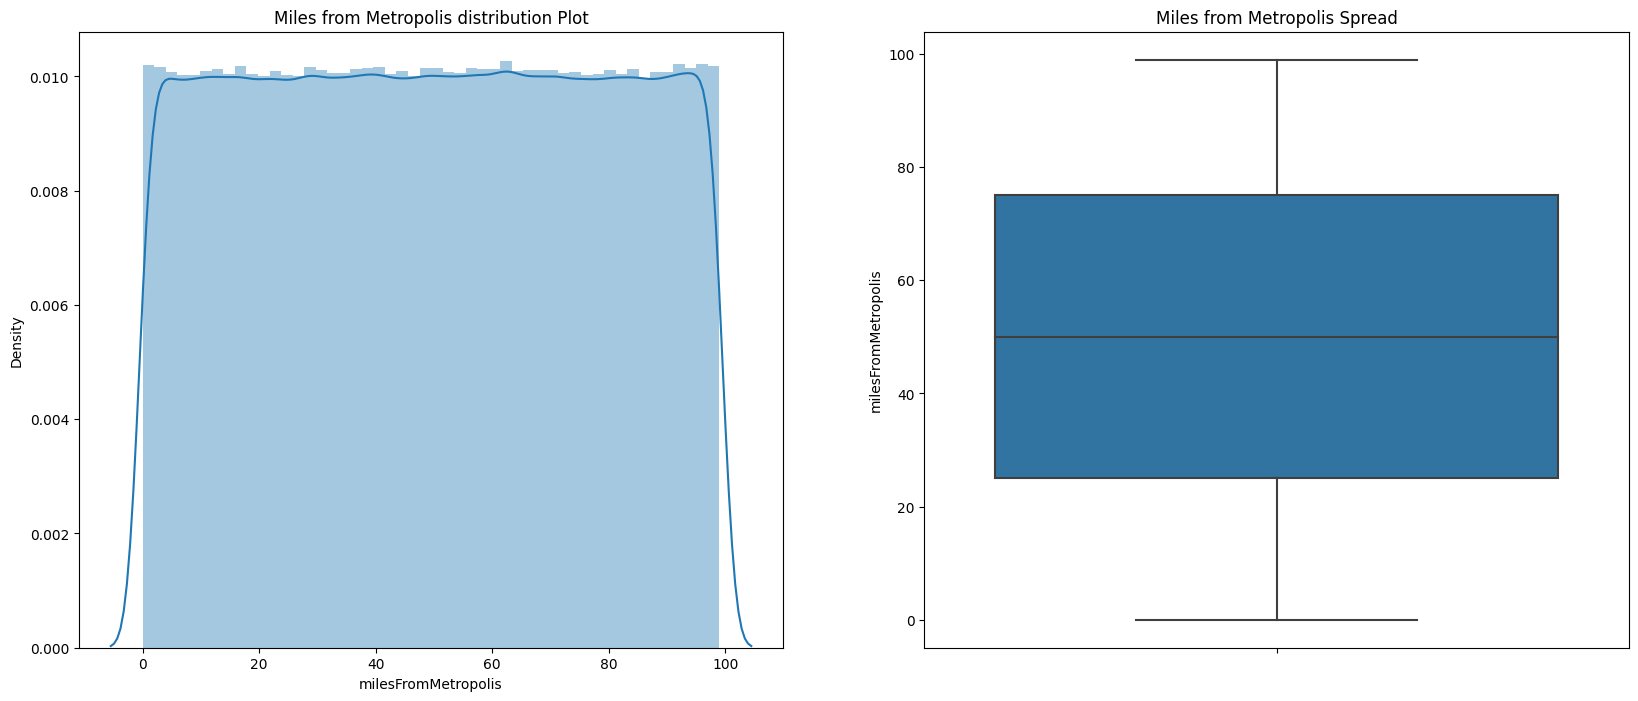

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Miles from Metropolis distribution Plot')
sns.distplot(df_train.milesFromMetropolis)

plt.subplot(1,2,2)
plt.title('Miles from Metropolis Spread')
sns.boxplot(y=df_train.milesFromMetropolis)

plt.show()

### Deduction
1) The years of experiecne and miles from metropolis features have very less varaition in them. 
They have few unique values. So, the normliaty test is not suitable on these features.

2) There are no outlieres in these two numerical descrete features.

### JpobType and Degree

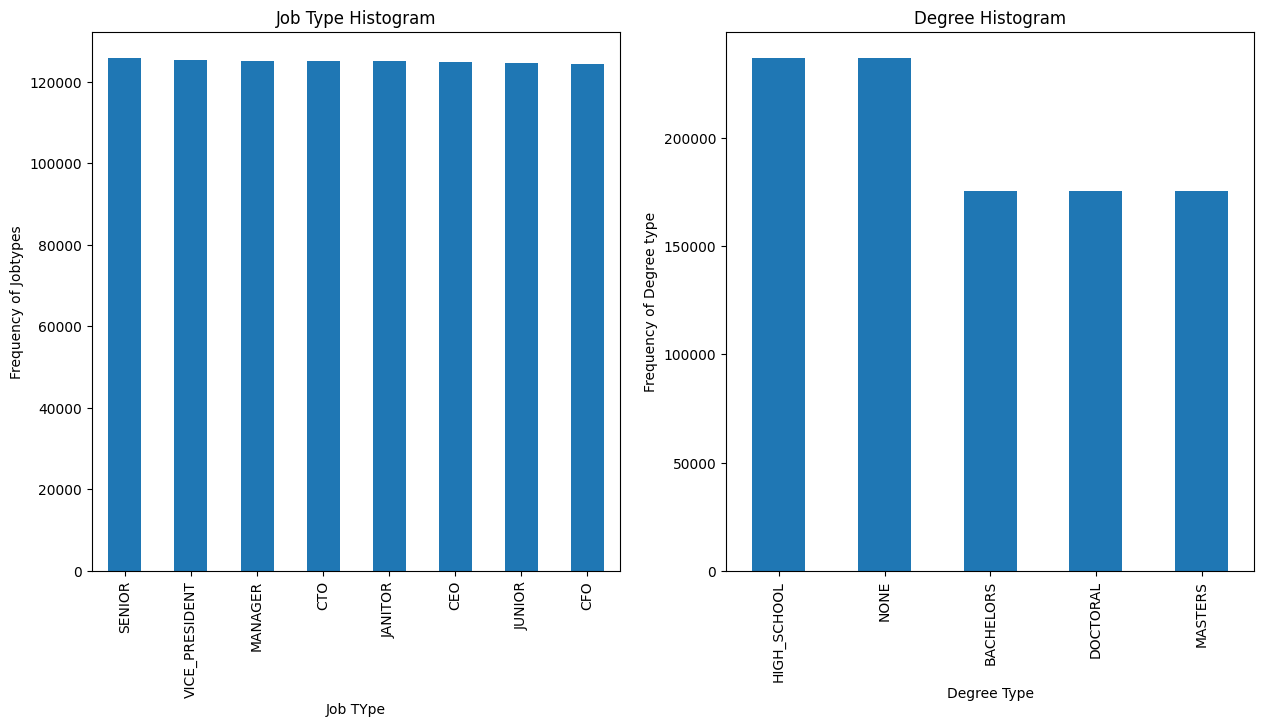

In [31]:
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt1 = df_train.jobType.value_counts().plot(kind='bar')
plt.title('Job Type Histogram')
plt1.set(xlabel = 'Job TYpe', ylabel='Frequency of Jobtypes')

plt.subplot(1,2,2)
plt1 = df_train.degree.value_counts().plot(kind='bar')
plt.title('Degree Histogram')
plt1.set(xlabel = 'Degree Type', ylabel='Frequency of Degree type')



plt.show()


### Deduction
1) The classes in Job type has equal representation.

2) High school deplomas and no degree are the most common qualification in the data. Whereas, BS, MS, and PhD have almost equal 
representaion.

### Degree Major and Industry type

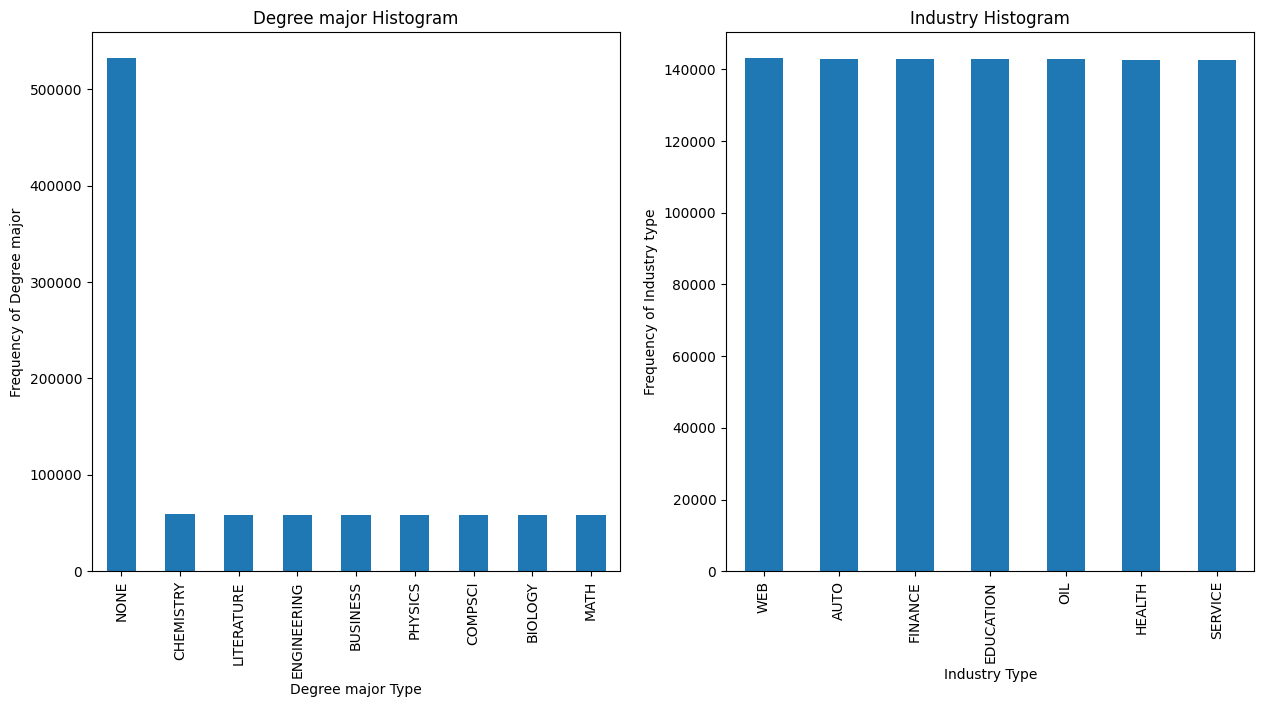

In [32]:
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt1 = df_train.major.value_counts().plot(kind ='bar')
plt.title('Degree major Histogram')
plt1.set(xlabel = 'Degree major Type', ylabel='Frequency of Degree major')

plt.subplot(1,2,2)
plt1 = df_train.industry.value_counts().plot(kind ='bar')
plt.title('Industry Histogram')
plt1.set(xlabel = 'Industry Type', ylabel='Frequency of Industry type')

plt.show()

### Deduction
1) Out of the degree's major type, None is the most common and frequent and this is inaccordance of none- degree from degree feature. The rest majors, such as Che, Math, Engr, Bus, Phy, CS, and Bio have almost equal representation.

2) All classes in Industry type have equal representation.

#### Lets explore the influence of independent numerical features on dependent feature (Salary)

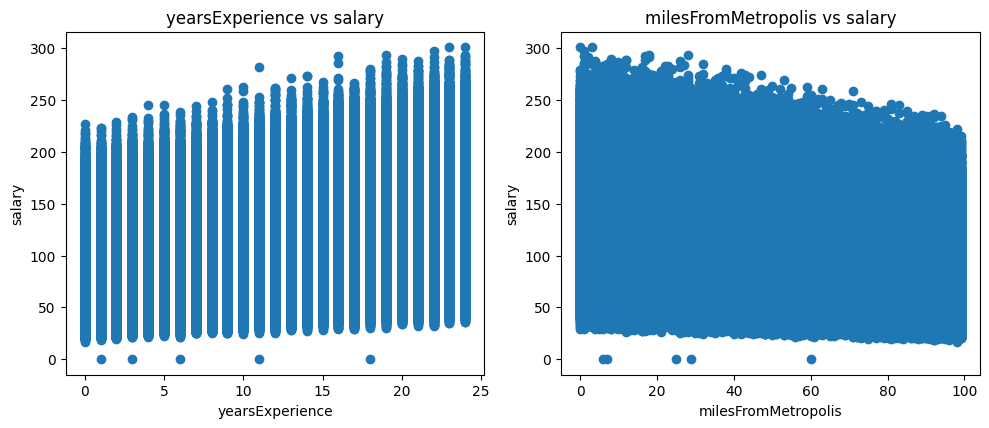

In [33]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df_train[x],df_train['salary'])
    plt.title(x+' vs salary')
    plt.ylabel('salary')
    plt.xlabel(x)

    
#'yearsExperience', 'milesFromMetropolis', 'salary'
plt.figure(figsize=(10,20))

scatter('yearsExperience', 1)
scatter('milesFromMetropolis', 2)

plt.tight_layout()

### Deduction
1) The salary increases with the increase in number of years of experiecne.

2) There is negative corelation of slary with miles from metropolis. It makes sense as people coming from far places, spend more time and energy on commutiting toworkspace and hence might be less productive.
That is why, the salary increase wih the decrease in distnace from metropolis. 

## Bivariant analysis

D:\UoH_PhD_Experiments\Side_effects_of_DOACs_NHS\ve_DOAC_NHS\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


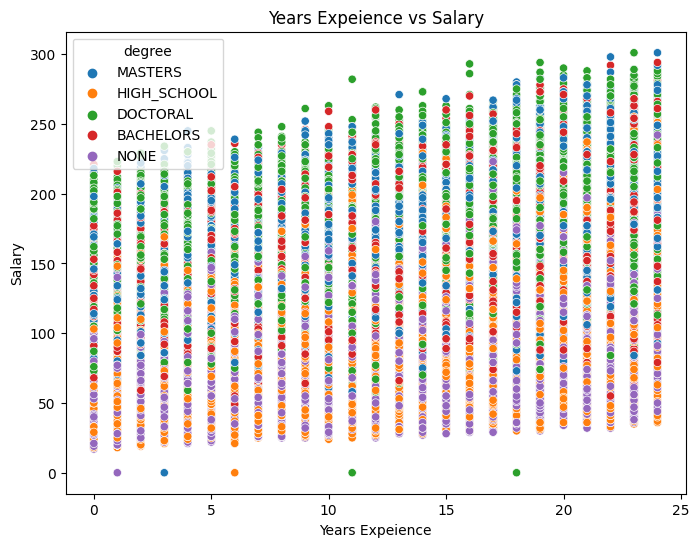

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(8,6))

plt.title('Years Expeience vs Salary')
sns.scatterplot(x=df_train['yearsExperience'],y=df_train['salary'],hue=df_train['degree'])
plt.xlabel('Years Expeience')
plt.ylabel('Salary')

plt.show()
plt.tight_layout()

### Deduction
Although, majority of the employees in the dataset have no degree and they are still getting work and decent salaray. 
However, the above figure showed that having higher education increases your chances of getting more salary. The green dots correspond to doctorate degress and irrespective of number of years, they are the highly paid employees and a positive trend with the increases in number of years. There are 5 missing values in salary( where salary is zero and we could reomve them later).

P.S. Same analysis could be done onIndustry type, degree major and Job type. 

# 3. Feature Engineering
## 3.1. One hot encoding

In [35]:
df_train_ohe = df_train.copy()
df_train_ohe.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [36]:

df_train_ohe = pd.get_dummies(df_train_ohe, columns=["jobType"], prefix="jobType")
df_train_ohe = pd.get_dummies(df_train_ohe, columns=["degree"], prefix="degree")
df_train_ohe = pd.get_dummies(df_train_ohe, columns=["major"], prefix="major")
df_train_ohe = pd.get_dummies(df_train_ohe, columns=["industry"], prefix="industry")

In [37]:
df_train_ohe.shape

(1000000, 34)

In [38]:
df_train_ohe.head(10)

,jobId,companyId,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,COMP37,10,83,130,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,COMP19,3,73,101,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,COMP52,10,38,137,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,COMP38,8,17,142,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,COMP7,8,16,163,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,JOB1362684407692,COMP15,2,31,113,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,JOB1362684407693,COMP15,23,24,178,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,JOB1362684407694,COMP24,9,70,73,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,JOB1362684407695,COMP20,1,54,31,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
9,JOB1362684407696,COMP41,17,68,104,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
df_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   jobId                   1000000 non-null  object
 1   companyId               1000000 non-null  object
 2   yearsExperience         1000000 non-null  int64 
 3   milesFromMetropolis     1000000 non-null  int64 
 4   salary                  1000000 non-null  int64 
 5   jobType_CEO             1000000 non-null  uint8 
 6   jobType_CFO             1000000 non-null  uint8 
 7   jobType_CTO             1000000 non-null  uint8 
 8   jobType_JANITOR         1000000 non-null  uint8 
 9   jobType_JUNIOR          1000000 non-null  uint8 
 10  jobType_MANAGER         1000000 non-null  uint8 
 11  jobType_SENIOR          1000000 non-null  uint8 
 12  jobType_VICE_PRESIDENT  1000000 non-null  uint8 
 13  degree_BACHELORS        1000000 non-null  uint8 
 14  degree_DOCTORAL    

### Correlation analysis

In [40]:
corr = df_train_ohe.corr()
corr.shape

C:\Users\scommaa\AppData\Local\Temp\ipykernel_21700\3352242485.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train_ohe.corr()


(32, 32)

<AxesSubplot: >

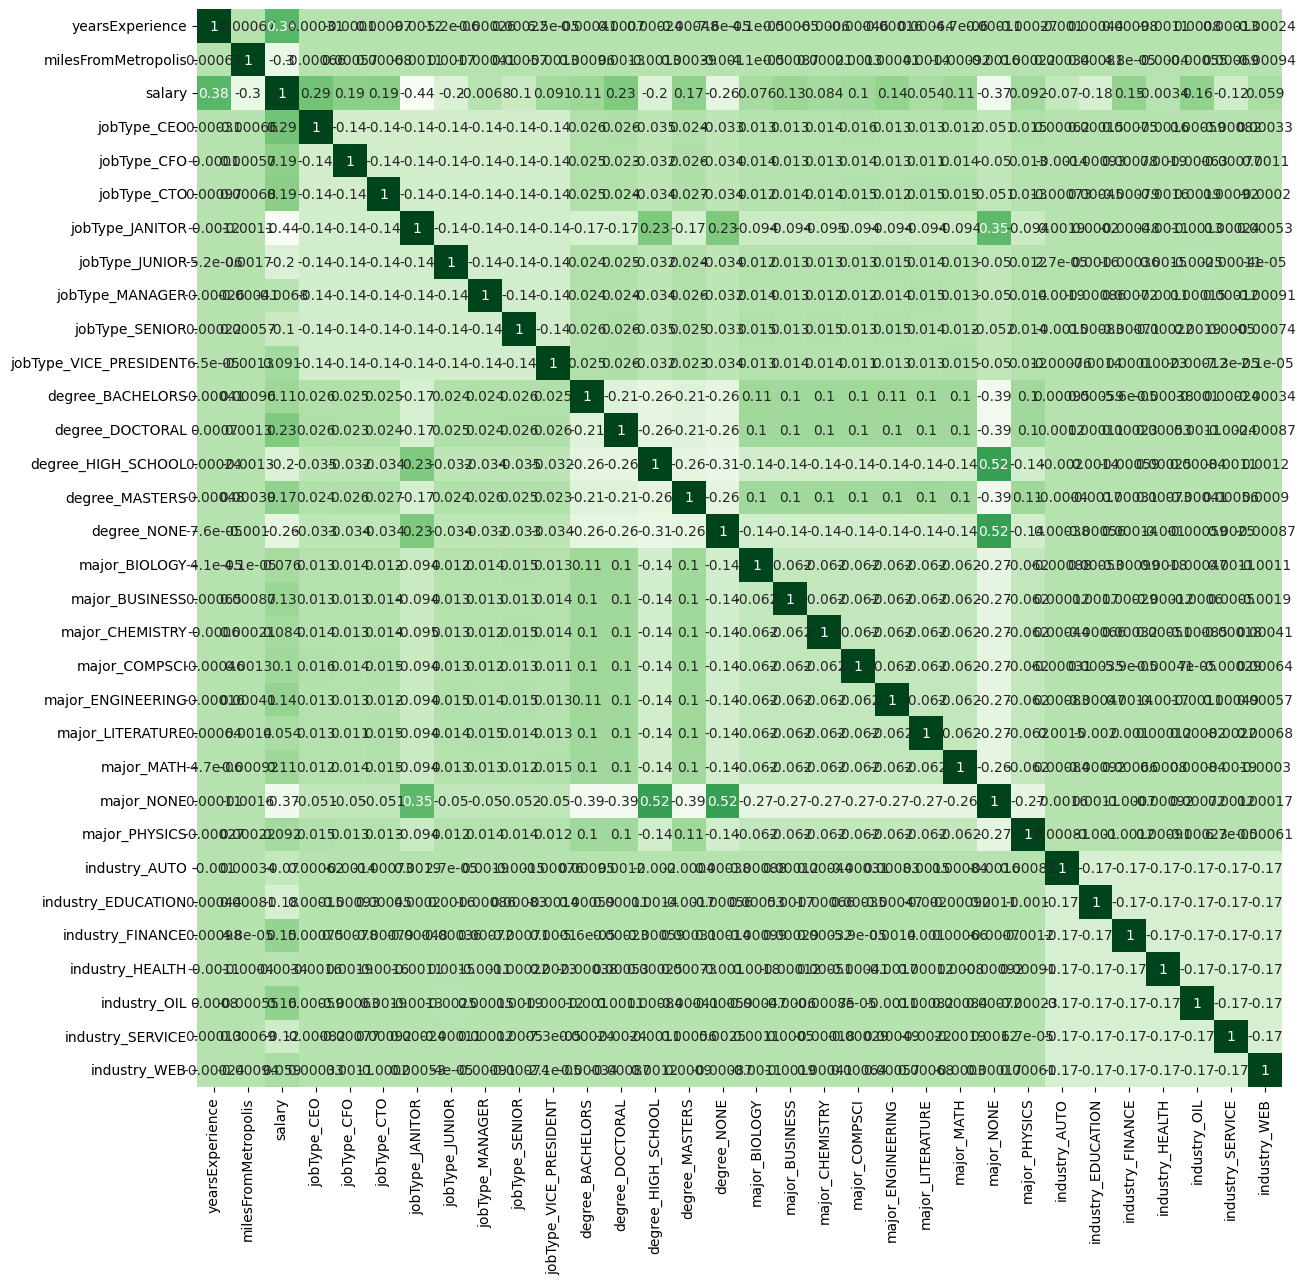

In [41]:

# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, annot=True, cmap='Greens')

## Feature selection

We are selecting all features except jobID and compnay id as they are not very useful for our analysis.

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_train_ohe[['yearsExperience', 'milesFromMetropolis',
       'jobType_CEO', 'jobType_CFO', 'jobType_CTO',
       'jobType_JANITOR', 'jobType_JUNIOR', 'jobType_MANAGER',
       'jobType_SENIOR', 'jobType_VICE_PRESIDENT', 'degree_BACHELORS',
       'degree_DOCTORAL', 'degree_HIGH_SCHOOL', 'degree_MASTERS',
       'degree_NONE', 'major_BIOLOGY', 'major_BUSINESS', 'major_CHEMISTRY',
       'major_COMPSCI', 'major_ENGINEERING', 'major_LITERATURE', 'major_MATH',
       'major_NONE', 'major_PHYSICS', 'industry_AUTO', 'industry_EDUCATION',
       'industry_FINANCE', 'industry_HEALTH', 'industry_OIL',
       'industry_SERVICE', 'industry_WEB']] #independent columns
y = df_train_ohe[['salary']]#target column i.e price range

In [43]:
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores.sort_values(by=['Score'])
featureScores

,Specs,Score
0,yearsExperience,6.162725e+05
1,milesFromMetropolis,1.509712e+06
2,jobType_CEO,7.319249e+04
3,jobType_CFO,3.504453e+04
4,jobType_CTO,3.521713e+04
5,jobType_JANITOR,2.901306e+05
6,jobType_JUNIOR,4.623028e+04
7,jobType_MANAGER,1.253958e+04
8,jobType_SENIOR,2.082864e+04
9,jobType_VICE_PRESIDENT,1.647992e+04


In [44]:
df_train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

# 3. Model Training
## 3.1 Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import sklearn.metrics
from sklearn import preprocessing

X = preprocessing.scale(X)

X = df_train_ohe[['yearsExperience', 'milesFromMetropolis',
       'jobType_CEO', 'jobType_CFO', 'jobType_CTO',
       'jobType_JANITOR', 'jobType_JUNIOR', 'jobType_MANAGER',
       'jobType_SENIOR', 'jobType_VICE_PRESIDENT', 'degree_BACHELORS',
       'degree_DOCTORAL', 'degree_HIGH_SCHOOL', 'degree_MASTERS',
       'degree_NONE', 'major_BIOLOGY', 'major_BUSINESS', 'major_CHEMISTRY',
       'major_COMPSCI', 'major_ENGINEERING', 'major_LITERATURE', 'major_MATH',
       'major_NONE', 'major_PHYSICS', 'industry_AUTO', 'industry_EDUCATION',
       'industry_FINANCE', 'industry_HEALTH', 'industry_OIL',
       'industry_SERVICE', 'industry_WEB']] #independent columns
y = df_train_ohe[['salary']]#target column i.e price range
# train test split using stratification
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)
# linear regression

model = LinearRegression()
result_LR= model.fit(X_train, y_train)

In [46]:
# Value of y intercept
model.intercept_

array([-1.39832655e+10])

### Model evaluation
𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

In [47]:
y_train_pred = model.predict(X_train)
# Model Evaluation
print('R^2:',r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_train_pred))
print('MSE:',mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))

R^2: 0.7434317821879985
Adjusted R^2: 0.7434204193617662
MAE: 15.848475001188005
MSE: 384.61692579963903
RMSE: 19.61165280642198


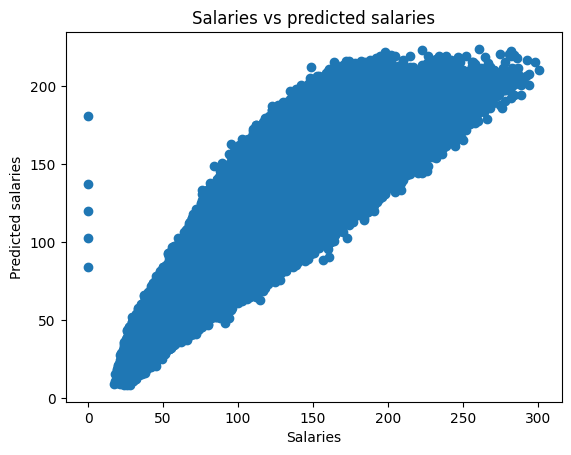

In [48]:
#pridiction
y_train_pred = model.predict(X_train)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Salaries")
plt.ylabel("Predicted salaries")
plt.title("Salaries vs predicted salaries")
plt.show()

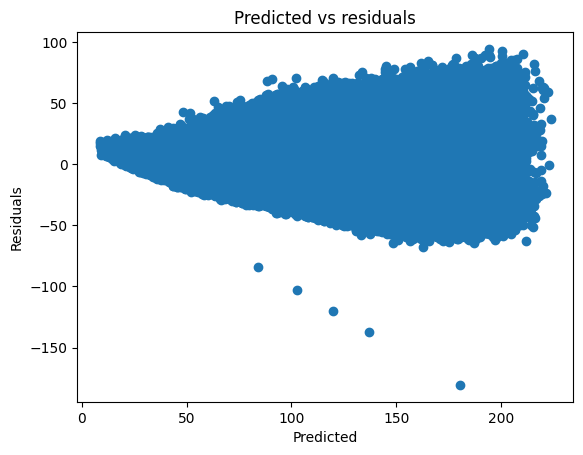

In [49]:
# Checking residuals
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

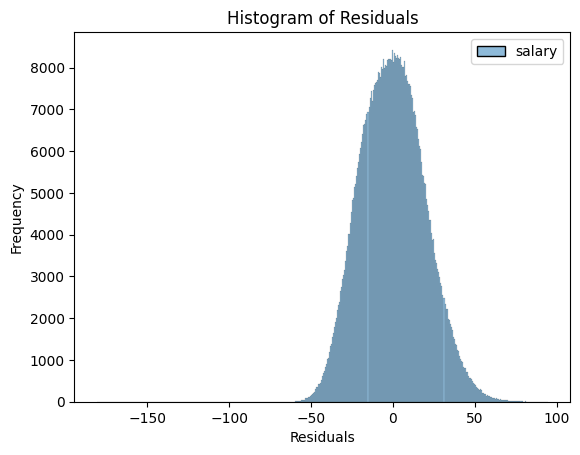

In [50]:
# Checking Normality of errors
sns.histplot(y_train-y_train_pred)  #distplot =old, displot or histpolt = new
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

### Testing model on left-out 30% test data

In [51]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)
# Model Evaluation on test data
acc_linreg = r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.7437662744442185
Adjusted R^2: 0.7437397941346781
MAE: 15.836340037314097
MSE: 384.10969993169317
RMSE: 19.598716792986554


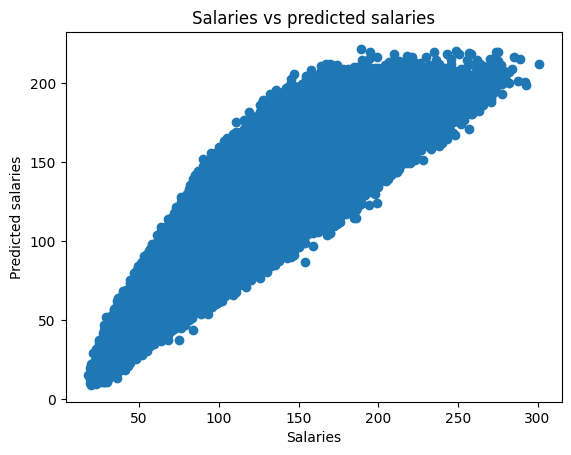

In [52]:
#pridiction
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Salaries")
plt.ylabel("Predicted salaries")
plt.title("Salaries vs predicted salaries")
plt.show()

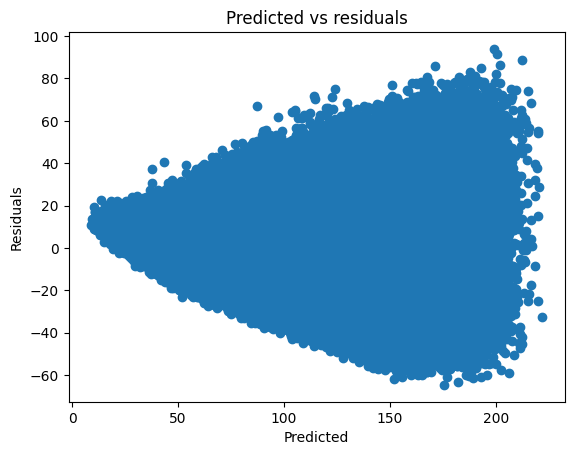

In [53]:
# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

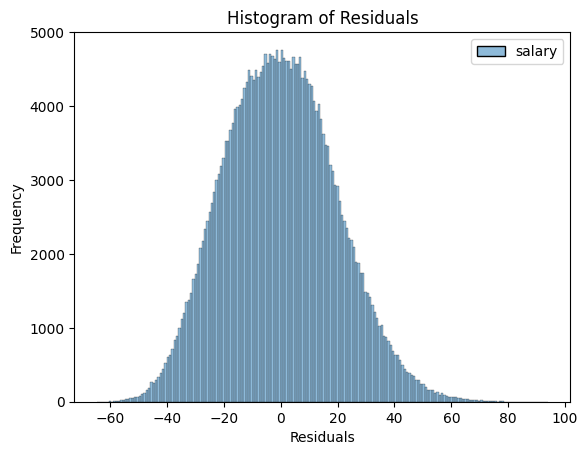

In [54]:
# Checking Normality of errors
sns.histplot(y_test-y_test_pred)  #distplot =old, displot or histpolt = new
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## 3.2 Random Forest Regressor

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700000, 31)
(300000, 31)
(700000, 1)
(300000, 1)


In [56]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [57]:
# Model prediction on train data
y_train_pred = reg.predict(X_train)
# Model Evaluation
print('R^2:',r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_train_pred))
print('MSE:',mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))

R^2: 0.9300969104230433
Adjusted R^2: 0.930093814573266
MAE: 7.879804071878765
MSE: 104.79049839558203
RMSE: 10.236723030129419


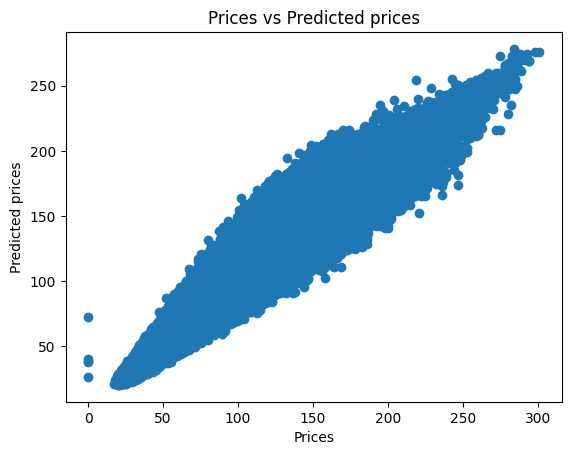

In [58]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

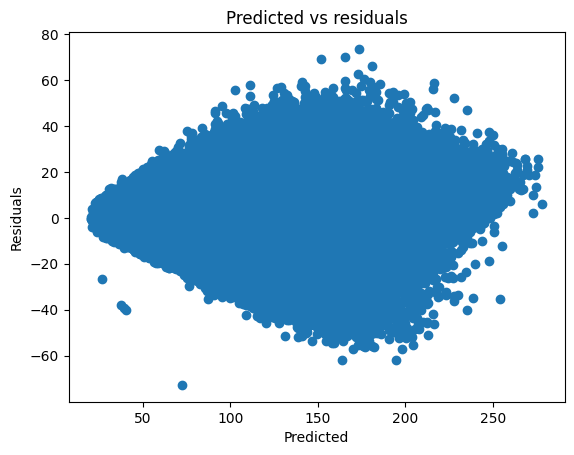

In [59]:
# Checking residuals
plt.scatter(y_train_pred,y_train.values.ravel()-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

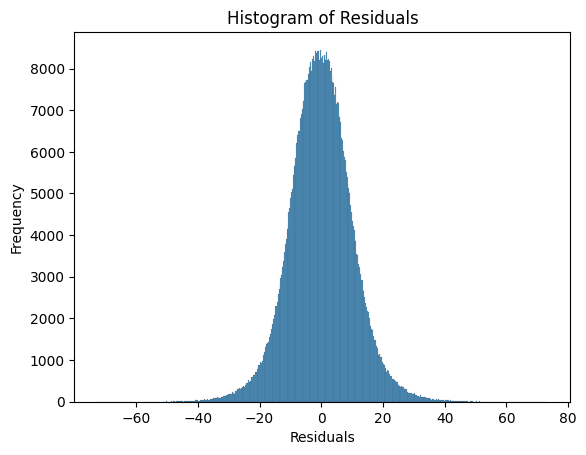

In [60]:
# Checking Normality of errors
sns.histplot(y_train.values.ravel()-y_train_pred)  #distplot =old, displot or histpolt = new
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Testing on the left-out 30% test dataset

In [61]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_rf = r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.7047023705112798
Adjusted R^2: 0.7046718531677161
MAE: 16.75160108445643
MSE: 442.66883138597586
RMSE: 21.039696561166842


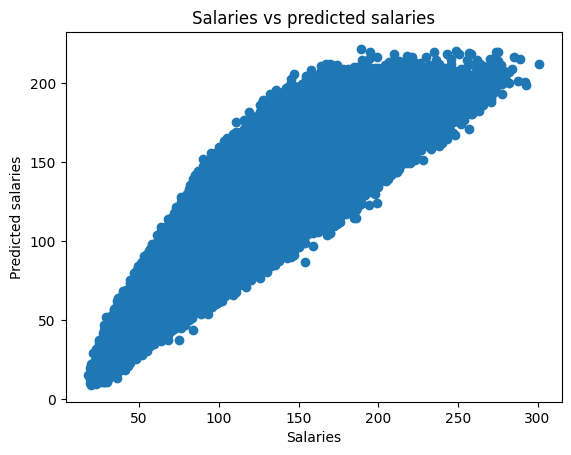

In [62]:
#pridiction
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Salaries")
plt.ylabel("Predicted salaries")
plt.title("Salaries vs predicted salaries")
plt.show()

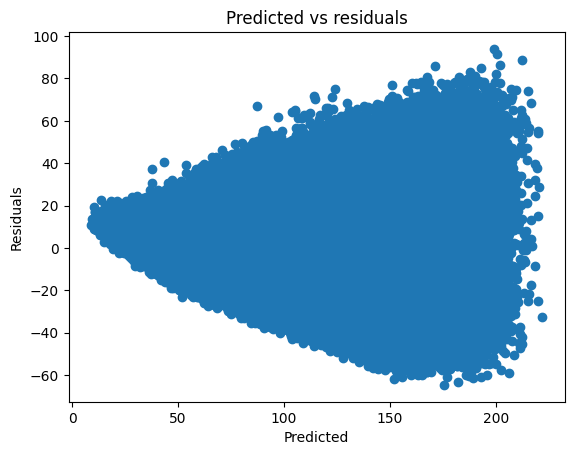

In [63]:
# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

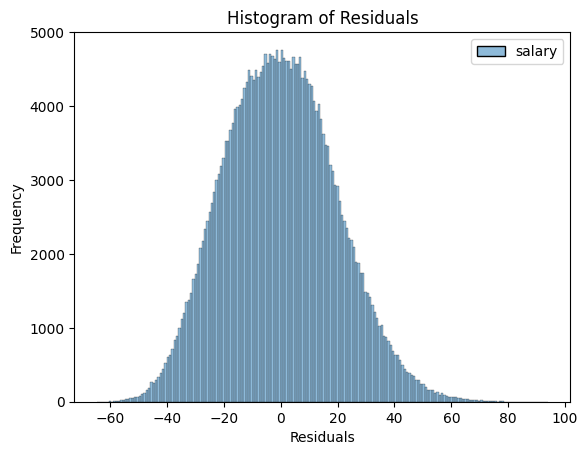

In [64]:
# Checking Normality of errors
sns.histplot(y_test-y_test_pred)  #distplot =old, displot or histpolt = new
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 4. Conclusion
Random Forest regression works better than Linera regression. So, we will choose it to run on our final test dataset. 

In [65]:
df_test = pd.read_csv('test_features.csv')
df_train_sal = pd.read_csv('train_salaries.csv')
y_test = df_train_sal.salary

df_test = pd.get_dummies(df_test, columns=["jobType"], prefix="jobType")
df_test = pd.get_dummies(df_test, columns=["degree"], prefix="degree")
df_test = pd.get_dummies(df_test, columns=["major"], prefix="major")
df_test = pd.get_dummies(df_test, columns=["industry"], prefix="industry")




X = df_test[['yearsExperience', 'milesFromMetropolis',
       'jobType_CEO', 'jobType_CFO', 'jobType_CTO',
       'jobType_JANITOR', 'jobType_JUNIOR', 'jobType_MANAGER',
       'jobType_SENIOR', 'jobType_VICE_PRESIDENT', 'degree_BACHELORS',
       'degree_DOCTORAL', 'degree_HIGH_SCHOOL', 'degree_MASTERS',
       'degree_NONE', 'major_BIOLOGY', 'major_BUSINESS', 'major_CHEMISTRY',
       'major_COMPSCI', 'major_ENGINEERING', 'major_LITERATURE', 'major_MATH',
       'major_NONE', 'major_PHYSICS', 'industry_AUTO', 'industry_EDUCATION',
       'industry_FINANCE', 'industry_HEALTH', 'industry_OIL',
       'industry_SERVICE', 'industry_WEB']]

In [66]:
# Model prediction on train data
y_pred = reg.predict(X)
# Model Evaluation
print('R^2:',r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: -0.8193675053331846
Adjusted R^2: -0.8194239075307204
MAE: 41.793109686757425
MSE: 2727.3721610635057
RMSE: 52.22424878409938


In [67]:
result = pd.DataFrame(data= {"jobId": df_train_sal.jobId,"salary":y_pred} )
result.to_csv("test_salaries.csv", encoding='utf-8', index=False)
result.head(5)

,jobId,salary
0,JOB1362684407687,99.923333
1,JOB1362684407688,85.388476
2,JOB1362684407689,164.580000
3,JOB1362684407690,114.815000
4,JOB1362684407691,99.110000
